In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap as Basemap
from pathlib import Path

### Data folder

In [2]:
cwd = Path.cwd()
parent_dir = cwd.parent.parent

parent_dir

PosixPath('/home/veror/Desktop/Tweet2Geo')

### Create directed weighted network

In [3]:
# network df
network_df = pd.read_csv(parent_dir / 'Data' / 'South America' / 'source_target_norm_day okok.csv')

# create degree graph

DG = nx.DiGraph()

for index, row in network_df.iterrows():
    if row['weight'] != 0:
        source = row['source']
        target = row['target']
        weight = row['weight']
        DG.add_edge(source, target, weight=weight)

edge_weights = [DG[u][v]['weight']/100 for u, v in DG.edges()]

### Compute degree

In [4]:
# DEGREE

# in and out degree
indegree_dict = dict(DG.in_degree(weight='weight'))
outdegree_dict = dict(DG.out_degree(weight='weight'))

for node, indegree in indegree_dict.items():
    print(f"Node {node}: Indegree (with weights) {indegree}")
for node, outdegree in outdegree_dict.items():
    print(f"Node {node}: Outdegree (with weights) {outdegree}")


# degree df for viualization on ORA
country_list = indegree_dict.keys()
in_list = []
out_list = []
tot_list = []

degree_df = pd.DataFrame(columns=['country', 'outdegree', 'indegree'], index=country_list)

for node, indegree in indegree_dict.items():
    degree_df.at[node, 'indegree'] = indegree
for node, outdegree in outdegree_dict.items():
    degree_df.at[node, 'outdegree'] = outdegree
degree_df['country'] = country_list

degree_df['total degree'] = degree_df['indegree'] + degree_df['outdegree']

#degree_df.to_csv(parent_dir / 'Data' / 'South America' / 'degree SA.csv')

Node AR: Indegree (with weights) 304.6268636797909
Node BO: Indegree (with weights) 69.39365414438363
Node BR: Indegree (with weights) 322.67907685324883
Node CL: Indegree (with weights) 149.833342383988
Node CO: Indegree (with weights) 216.24688343004914
Node EC: Indegree (with weights) 91.03288459428788
Node PY: Indegree (with weights) 67.43000105153062
Node PE: Indegree (with weights) 183.42835483021318
Node UY: Indegree (with weights) 87.38527905379178
Node VE: Indegree (with weights) 299.708362042436
Node AR: Outdegree (with weights) 387.85714285714283
Node BO: Outdegree (with weights) 17.114928909952607
Node BR: Outdegree (with weights) 320.0
Node CL: Outdegree (with weights) 233.30769230769232
Node CO: Outdegree (with weights) 284.0
Node EC: Outdegree (with weights) 129.63302752293578
Node PY: Outdegree (with weights) 68.54014598540147
Node PE: Outdegree (with weights) 104.36562073669847
Node UY: Outdegree (with weights) 96.21187800963082
Node VE: Outdegree (with weights) 150.73

### Network measures

In [11]:
# NETWORK MEASURES

degree_centrality = nx.degree_centrality(DG)
closeness_centrality = nx.closeness_centrality(DG)
betweenness_centrality = nx.betweenness_centrality(DG)
clustering_coefficient = nx.average_clustering(DG)
density = nx.density(DG)

print(f"Degree centrality: {degree_centrality}")
print(f"Closeness centrality: {closeness_centrality}")
print(f"Betweenness centrality: {betweenness_centrality}")
print(f"Clustering coefficient: {clustering_coefficient}")
print(f"Network density: {density}") #todo normalization check

Degree centrality: {'AR': 2.0, 'BO': 1.8888888888888888, 'BR': 1.7777777777777777, 'CL': 2.0, 'CO': 2.0, 'EC': 1.8888888888888888, 'PY': 2.0, 'PE': 2.0, 'UY': 2.0, 'VE': 2.0}
Closeness centrality: {'AR': 1.0, 'BO': 0.9, 'BR': 1.0, 'CL': 1.0, 'CO': 1.0, 'EC': 0.9, 'PY': 1.0, 'PE': 1.0, 'UY': 1.0, 'VE': 1.0}
Betweenness centrality: {'AR': 0.003968253968253968, 'BO': 0.0, 'BR': 0.0, 'CL': 0.003968253968253968, 'CO': 0.003968253968253968, 'EC': 0.0, 'PY': 0.003968253968253968, 'PE': 0.003968253968253968, 'UY': 0.003968253968253968, 'VE': 0.003968253968253968}
Clustering coefficient: 0.9789930555555555
Network density: 0.9777777777777777


### Map

In [12]:
# map

plt.figure(figsize = (10,10))

m = Basemap(llcrnrlon=-84, llcrnrlat=-57, \
            urcrnrlon=-29, urcrnrlat=16, \
            resolution='l',projection='merc',
            )

<Figure size 1000x1000 with 0 Axes>

In [13]:
# set lat - lon

lat_lon_df = pd.read_csv(parent_dir / 'Data' / 'South America' / 'lat_lon_SA.csv')

mx, my = m(lat_lon_df['lon'].values, lat_lon_df['lat'].values)

lon_mer = []
lat_mer = []

pos = {}

for count, elem in enumerate (lat_lon_df['ISO 2']):
    
    pos[elem] = (mx[count], my[count])

In [14]:
# set degree df

degree_df = pd.read_csv(parent_dir / 'Data' / 'South America' / 'degree SA.csv')

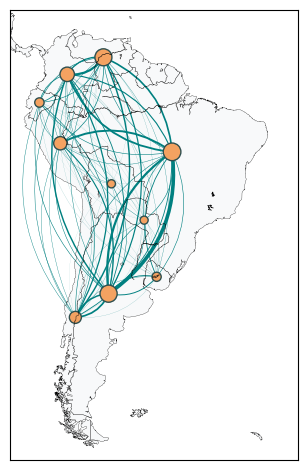

In [16]:
# in-strenght map

m.fillcontinents(color='#f8f9fa')

nx.draw_networkx_nodes(G = DG, pos = pos, node_color = '#f4a261', alpha = 1, node_size = degree_df['indegree']/2, edgecolors='darkslategray')
nx.draw_networkx_edges(G = DG, pos = pos, edge_color='teal', alpha=1, width=np.array(edge_weights).astype(float)*2, arrowstyle='-', connectionstyle = 'arc3,rad=0.3', min_source_margin=0, min_target_margin=0, node_size = degree_df['indegree']/2)

m.drawcountries(linewidth = 0.3)

m.drawcoastlines(linewidth=0.2)

plt.tight_layout()

plt.savefig(parent_dir / 'Data analysis' / 'Network measures' / 'in_strength_SA.pdf')

plt.show()

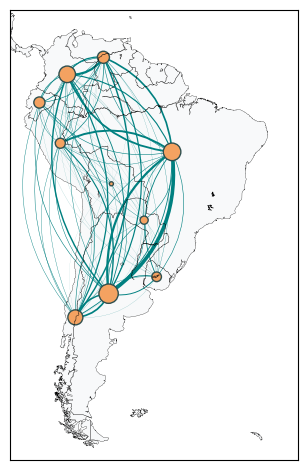

In [17]:
# out-strenght map

m.fillcontinents(color='#f8f9fa')

nx.draw_networkx_nodes(G = DG, pos = pos, node_color = '#f4a261', alpha = 1, node_size = degree_df['outdegree']/2, edgecolors='darkslategray')
nx.draw_networkx_edges(G = DG, pos = pos, edge_color='teal', alpha=1, width=np.array(edge_weights).astype(float)*2, arrowstyle='-', connectionstyle = 'arc3,rad=0.3', min_source_margin=0, min_target_margin=0, node_size = degree_df['outdegree']/2)

m.drawcountries(linewidth = 0.3)

m.drawcoastlines(linewidth=0.2)

plt.tight_layout()

plt.savefig(parent_dir / 'Data analysis' / 'Network measures' / 'out_strength_SA.pdf')

plt.show()